In [18]:
from Fun_to_prepare_data import * 
from sklearn.model_selection import train_test_split
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import numpy as np
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation, Dropout, Flatten, Dense
import tensorflow as tf

In [19]:
paths={1:"../imputs/oranges_dataset/oranges_pictures/",
      0:"../imputs/oranges_dataset/random_pictures/"}
images={}
for clas,path in paths.items():
    images[clas]=[]
    for im in listdir(path):
        if im.endswith("jpg") or im.endswith("png"):
            a=resize_image(path+im,(64,64))
            images[clas].append(np.asarray(a))
    images[clas]=np.array(images[clas])

In [3]:
X= np.concatenate(list(images.values()),axis=0)

In [4]:
y = np.concatenate([[k]* v.shape[0] for k,v in images.items()])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
img_width, img_height = 64, 64
img_rows, img_cols = 64, 64

# Prepare data to feed the NN
num_classes = 2

# Ask keras which format to use depending on used backend and arrange data as expected
if K.image_data_format() == 'channels_first':
    X_train = x_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_test = x_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_width, img_height)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_width, img_height, 3)

# Incoming data is in uint8. Cast the input data images to be floats in range [0.0-1.0]  
X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)
#X_train = X_train.astype('float32') / 255
#X_test = X_test.astype('float32') / 255

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (750, 64, 64, 3)
750 train samples
188 test samples


In [7]:
img_width, img_height = 64, 64

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.Flatten())

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [8]:
batch_size = 100
epochs = 20

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/20
8/8 [==============================] - 3s 374ms/step - loss: 0.6779 - accuracy: 0.5760 - val_loss: 0.6437 - val_accuracy: 0.5691
Epoch 2/20
8/8 [==============================] - 3s 346ms/step - loss: 0.5926 - accuracy: 0.6827 - val_loss: 0.5021 - val_accuracy: 0.8032
Epoch 3/20
8/8 [==============================] - 3s 353ms/step - loss: 0.4749 - accuracy: 0.7787 - val_loss: 0.4089 - val_accuracy: 0.8404
Epoch 4/20
8/8 [==============================] - 3s 342ms/step - loss: 0.4206 - accuracy: 0.8173 - val_loss: 0.4452 - val_accuracy: 0.8245
Epoch 5/20
8/8 [==============================] - 3s 344ms/step - loss: 0.3767 - accuracy: 0.8427 - val_loss: 0.3635 - val_accuracy: 0.8511
Epoch 6/20
8/8 [==============================] - 3s 347ms/step - loss: 0.3741 - accuracy: 0.8493 - val_loss: 0.3610 - val_accuracy: 0.8457
Epoch 7/20
8/8 [==============================] - 3s 346ms/step - loss: 0.3438 - accuracy: 0.8613 - val_loss: 0.3486 - val_accuracy: 0.8457
Epoch 8/20
8/8 [====

In [9]:
# Evaluate the model with test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.40828168392181396
Test accuracy: 0.8457446694374084


La probabilidad de que sea una naranja es de 0.02837594971060753 el 2% restante es una pajita! 


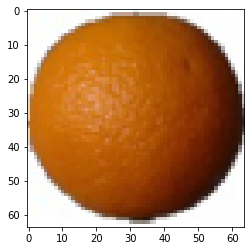

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

img = X_test[184]
pred = model.predict(np.expand_dims(img,axis=0))[0]
print(f"La probabilidad de que sea una naranja es de {pred[0]} el 2% restante es una pajita! ")
#print("Probs -> Cat:{0:.5f} Dog:{1:.5f}".format(pred[0],pred[1]))
plt.imshow(X[184])